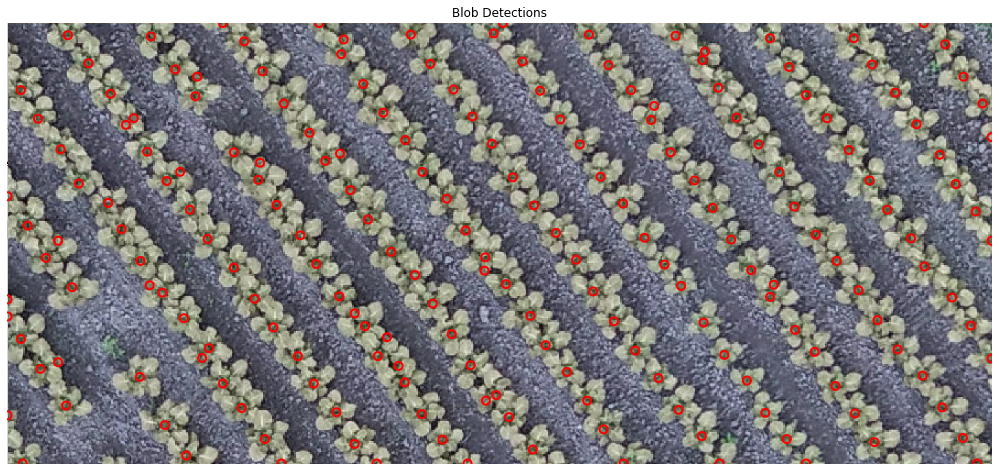

In [15]:
import cv2
import sys
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import math
from skimage import data
from skimage.color import rgb2gray
from skimage.feature import blob_dog, blob_log, blob_doh
import time
from numba import jit
import os,psutil

%matplotlib inline

image=cv2.imread('./InputImages/zoomed.jpg',0)
frame=cv2.imread('./InputImages/zoomed.jpg')

    
# Transform to HSV
hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    
# Apply Filter to detect the blue side panels of the gates
#lower_red = np.array([29,41,0])
#upper_red = np.array([88,86,145])

lower_red = np.array([62,4,11])
upper_red = np.array([89,128,150])

lower_red_line = np.array([62,0,47])
upper_red_line = np.array([91,255,208])

mask = cv2.inRange(hsv, lower_red, upper_red)
res  =  cv2.bitwise_and(frame,frame, mask= mask)
mask = cv2.blur(mask,(20,20))  


mask_line = cv2.inRange(hsv, lower_red_line, upper_red_line)

mask_line = cv2.blur(mask_line,(10,10)) 
mask_line = cv2.blur(mask_line,(10,10))
mask_line = cv2.blur(mask_line,(10,10))


kernel = np.ones((5,5),np.uint8)
mask_line = cv2.erode(mask_line,kernel,iterations = 0)

edges = cv2.Canny(mask_line,100,150,apertureSize = 3)

lines = cv2.HoughLines(edges,1,np.pi/180,100)
lines
for rho,theta in lines[0]:
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))

    cv2.line(mask_line,(x1,y1),(x2,y2),(0,0,255),2)

# cv2.imwrite('houghlines3.jpg',mask_line)

blobs_dog = blob_dog(mask, max_sigma=10, threshold=.3)


blobs_list = [blobs_dog]
colors = ['red']
titles = [ 'Blob Detections']
     #         'Determinant of Hessian']
sequence = zip(blobs_list, colors, titles)
   
fig, axes = plt.subplots(1, 3, figsize=(60, 30), sharex=True, sharey=True)
fig.delaxes(axes.flatten()[2])
fig.delaxes(axes.flatten()[1])
ax = axes.ravel()

cc=0;
for idx, (blobs, color, title) in enumerate(sequence):
    pp=np.ones((len(blobs),2))
    ax[idx].set_title(title)
    ax[idx].imshow(frame)
    for blob in blobs:
        y, x, r = blob
        pp[cc,1]=y;
        pp[cc,0]=x;
        c = plt.Circle((x, y), r, color=color, linewidth=2, fill=False)
        ax[idx].add_patch(c)
        cc=cc+1;
    ax[idx].set_axis_off()
    
blobs_dog=np.delete(blobs_dog, 2, 1)
blobs_dog=np.flip(blobs_dog, 1)
xy=[]
xy=np.array([1,2])
h, w = image.shape[0], image.shape[1]

#A = np.vstack((A, X[X[:,0] < 3]))
for k in range (-20,w+20,10):
    xy[0]=k;
    xy[1]=-20;
    blobs_dog=np.vstack([blobs_dog, xy])
for k in range (-20,w+20,10):  
    xy[0]=k;
    xy[1]=h+20;
    blobs_dog=np.vstack([blobs_dog, xy])
for k in range (-20,h+20,10):
    xy[0]=-20;
    xy[1]=k;
    blobs_dog=np.vstack([blobs_dog, xy])
for k in range (-20,h+20,10):  
    xy[0]=w+20;
    xy[1]=k;
    blobs_dog=np.vstack([blobs_dog, xy])    

    
    


text_address = './data/blobst.txt'
np.savetxt(text_address, blobs_dog, fmt = '%d')

In [11]:
blobs_dog

array([[1589.,  722.],
       [1309.,  722.],
       [1167.,  722.],
       ...,
       [1614.,  700.],
       [1614.,  710.],
       [1614.,  720.]])

In [ ]:
for k range (0,w,20):
    xy[0,0]=k;
    xy[0,1]=0;
    blobs_dog=blobs_dogappend(xy)
for k range (0,w,20):  
    xy[0,0]=k;
    xy[0,1]=h;
    blobs_dog=blobs_dogappend(xy)
for k range (0,h,10):
    xy[0,0]=0;
    xy[0,1]=k;
    blobs_dog=blobs_dogappend(xy)
for k range (0,h,10):  
    xy[0,0]=w;
    xy[0,1]=k;
    blobs_dog=blobs_dogappend(xy)  